# MSN 514 - Chapter 09: Bak

## Sandpile model

### Every step you take

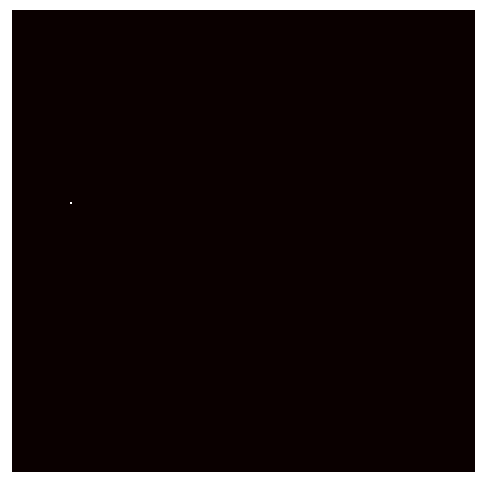

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Function to perform the toppling
def topple(state, n, m, N):
    avalanche = np.zeros((N, N))
    parents_site = [(n, m)]
    state[n, m] += 1
    count = 0

    while parents_site:
        children_site = []
        for (i, j) in parents_site:
            if state[i, j] > 3:
                count += 1
                avalanche[i, j] += 1
                state[i, j] -= 4

                for di, dj in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < N and 0 <= nj < N:
                        children_site.append((ni, nj))
                        state[ni, nj] += 1

        parents_site = children_site

    return state, avalanche, count

# Parameters
N = 200  # Number of cells in each dimension
T = 1000  # Total number of new grains

# Initial conditions
random_site = np.random.randint(2, N-1, size=(T, 2))
state = np.random.randint(0, 4, size=(N, N))

# Simulation loop
for t in range(T):
    state, avalanche, count = topple(state, *random_site[t], N)
    if count > 0:
        clear_output(wait=True)
        plt.figure(figsize=(6, 6))
        plt.imshow(avalanche, cmap='hot', interpolation='nearest')
        plt.axis('equal')
        plt.axis('off')
        plt.show()

### Every record you break

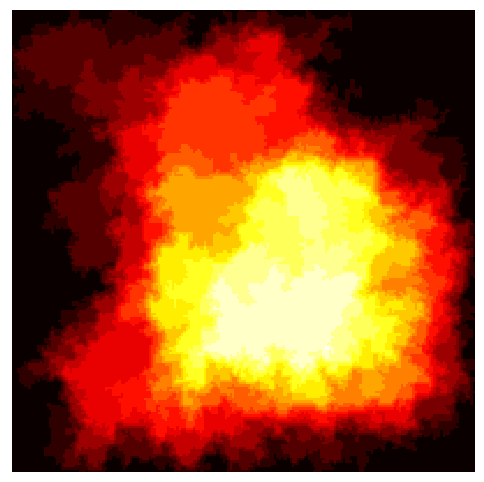

KeyboardInterrupt: 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Function to perform the toppling
def topple(state, n, m, N):
    avalanche = np.zeros((N, N))
    parents_site = [(n, m)]
    state[n, m] += 1
    count = 0

    while parents_site:
        children_site = []
        for (i, j) in parents_site:
            if state[i, j] > 3:
                count += 1
                avalanche[i, j] += 1
                state[i, j] -= 4

                for di, dj in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < N and 0 <= nj < N:
                        children_site.append((ni, nj))
                        state[ni, nj] += 1

        parents_site = children_site

    return state, avalanche, count

# Parameters
N = 200  # Number of cells in each dimension
T = 100000  # Total number of new grains

# Initial conditions
random_site = np.random.randint(2, N-1, size=(T, 2))
state = np.random.randint(0, 4, size=(N, N))

max_avalanche = 0

# Simulation loop
for t in range(T):
    state, avalanche, count = topple(state, *random_site[t], N)
    if count > max_avalanche:
        max_avalanche = count
        clear_output(wait=True)
        plt.figure(figsize=(6, 6))
        plt.imshow(avalanche, cmap='hot', interpolation='nearest')
        plt.axis('equal')
        plt.axis('off')
        plt.show()

### Every state you plot

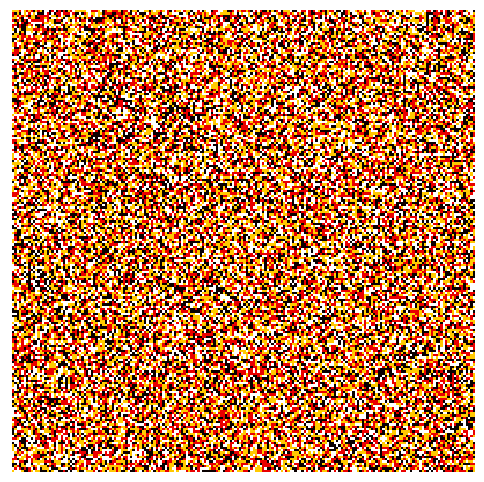

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(state, cmap='hot', interpolation='nearest')
plt.axis('equal')
plt.axis('off')
plt.show()

## Fault lines

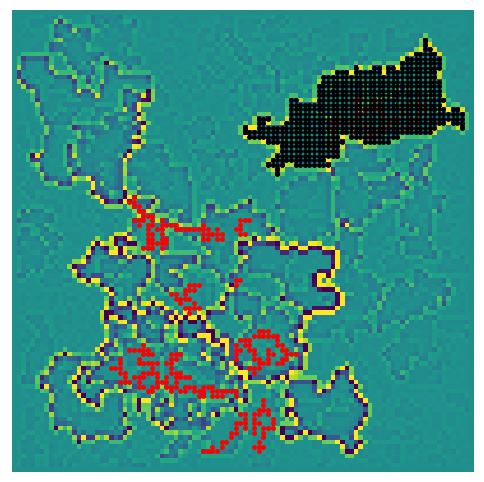

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Topple function
def topple(state, n, m, N):
    avalanche = np.zeros((N, N))
    change = np.zeros((N, N))
    parents_site = [(n, m)]
    state[n, m] += 1
    change[n, m] += 1
    count = 0

    while parents_site:
        children_site = []
        for (i, j) in parents_site:
            if state[i, j] > 3:
                count += 1
                avalanche[i, j] += 1
                state[i, j] -= 4
                change[i, j] -= 4

                for di, dj in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                    ni, nj = i + di, j + dj
                    if 1 <= ni < N-1 and 1 <= nj < N-1:
                        children_site.append((ni, nj))
                        state[ni, nj] += 1
                        change[ni, nj] += 1

        parents_site = children_site

    return state, avalanche, change, count

# Parameters
N = 100
T = 1000000
random_site = np.random.randint(1, N-1, size=(T, 2))
state = np.random.randint(0, 4, size=(N, N))

max_count = 0
for t in range(T):
    state0 = state.copy()
    state, avalanche, change, count = topple(state, *random_site[t], N)
    if count > max_count:
        max_count = count
    
    if max_count > 1000 and count > 10:
        total_count = np.zeros((N, N))
        total_change = np.zeros((N, N))
        for n in range(1, N-1):
            for m in range(1, N-1):
                _, _, local_change, local_count = topple(state0.copy(), n, m, N)
                total_count[n, m] += local_count
                total_change += local_change

        clear_output(wait=True)
        plt.figure(figsize=(6, 6))
        plt.imshow(total_change, vmin=-300, vmax=300, cmap='viridis')
        
        significant_count = np.argwhere(total_count > 10 * np.mean(total_count))
        for y, x in significant_count:
            plt.plot(x, y, 'r.', markersize=5)
        avalanche_sites = np.argwhere(avalanche > 0)
        for y, x in avalanche_sites:
            plt.plot(x, y, 'k.', markersize=5)

        plt.axis('equal')
        plt.axis('off')
        plt.show()


## Event size distribution

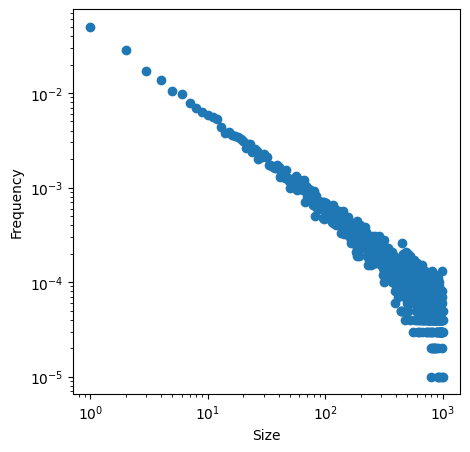

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Function to perform the toppling
def topple(state, n, m, N):
    avalanche = np.zeros((N, N))
    parents_site = [(n, m)]
    state[n, m] += 1
    count = 0

    while parents_site:
        children_site = []
        for (i, j) in parents_site:
            if state[i, j] > 3:
                count += 1
                avalanche[i, j] += 1
                state[i, j] -= 4

                for di, dj in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < N and 0 <= nj < N:
                        children_site.append((ni, nj))
                        state[ni, nj] += 1

        parents_site = children_site

    return state, avalanche, count

# Parameters
N = 50     # Number of cells in each dimension
T = 100000  # Total number of new grains
S = 1000    # Largest size of interest

s = np.zeros(S)

# Initial runs to reach self-organized criticality
random_site = np.random.randint(2, N-1, size=(T, 2))
state = np.random.randint(0, 4, size=(N, N))
for t in range(T):
    state, avalanche, count = topple(state, *random_site[t], N)

# Generate event size distribution
random_site = np.random.randint(2, N-1, size=(T, 2))
for t in range(T):
    state, avalanche, count = topple(state, *random_site[t], N)
    # size_event = count
    size_event = np.sum(avalanche > 0)
    if size_event > 0 and size_event < S:
        s[size_event] += 1

plt.figure(figsize=(5, 5))
plt.loglog(s/T, 'o')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

In [17]:
np.polyfit(np.log(range(1, S)), np.log(s[1:]+1), 1)

array([-0.76967622,  5.46694567])

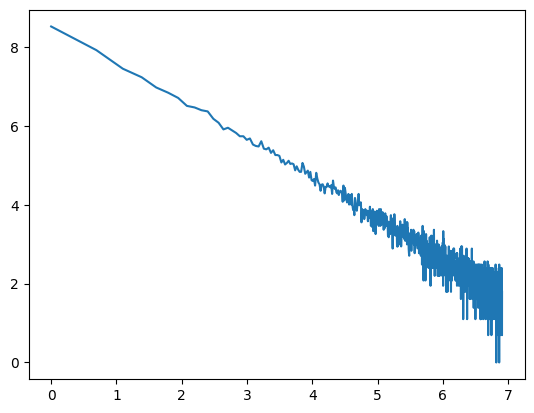

In [ ]:
plt.plot(np.log(range(1, S)), np.log(s[1:]+1))